In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import h5py
import string

%matplotlib inline

In [12]:
h5f = h5py.File('kernels/Q_hourly_kernels_1D_Grayver2017.h5', 'r')
Qn_FD = h5f['Q_n_log'][()]
omega = h5f['omega_log'][()]
Q_kernels = h5f['Q_kernels'][()]
Q_times = h5f['Q_times'][()]
degrees = range(1, Q_kernels.shape[1])

/home/agrayver/anaconda3/envs/geomag/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/agrayver/anaconda3/envs/geomag/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


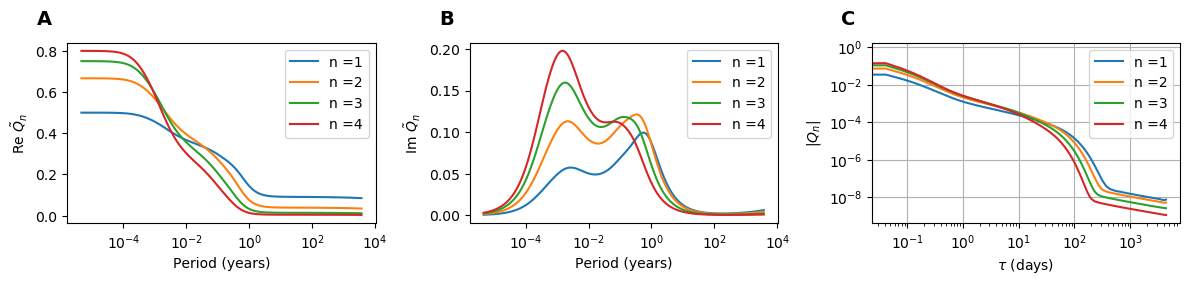

In [16]:
fig=plt.figure(figsize=(12, 3), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
for n in degrees:
    ax1.semilogx(2. * np.pi / omega / (24*3600*365.25), np.real(Qn_FD[:,n-1]), label = 'n ='+str(n))
    ax2.semilogx(2. * np.pi / omega / (24*3600*365.25), np.imag(Qn_FD[:,n-1]), label = 'n ='+str(n))
    ax3.loglog(Q_times / (3600*24), np.abs(Q_kernels[:, n - 1]), label='n ='+str(n))

ax3.set_xlabel(r'$\tau$ (days)')
ax3.set_ylabel(r'$|Q_n|$')
ax3.grid()
ax3.legend()    
ax1.set_xlabel('Period (years)')
ax1.set_ylabel(r'Re $\tilde{Q}_n$')
ax1.legend()    
ax2.set_xlabel('Period (years)')
ax2.set_ylabel(r'Im $\tilde{Q}_n$')
ax2.legend()    

ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes, size=14, weight='bold')
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes, size=14, weight='bold')
ax3.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax3.transAxes, size=14, weight='bold')

fig.subplots_adjust(wspace = 0.3)
fig.tight_layout()
fig.savefig('figures/Q1D.png',dpi = 150);